<h1>ALG_004_EXP_002-Baseline-MacLean_et_al-param_search</h1>
<h1>Introduction</h1>
<p>The assumption that the value of the match parameter contributes to streaking artefacts was hypothesized in&nbsp; <a href="ALG_001-EXP_001-Baseline.ipynb">ALG_001-EXP_001-Baseline</a>. While it had been stated that the lack of inter-scanline constraints were responsible for such artefacts (Scharstein, Szeliski and Zabih, 2001), this idea was intended to be investigated further in this experiment.</p>
<h1>Abstract</h1>
<p>The assumption that simply by changing one parameter&rsquo;s, match&rsquo;s value would reduce streaking artefacts (Hirschmuller, 2008) were tested further on two scenes of the Middlebury 2003 dataset. While the results due to the size of the dataset were not statistically substantiated, clear correlation between the match value and streaking artefacts (and as a result, measured error) was visually observed. Comparing different metrics was not conclusive as they had contradictory results. Further research was decided into this matter.</p>
<h1>Relevant theory</h1>
<p>The streaking artefacts ( please visit&nbsp; <a href="ALG_004_EXP_002-VIS.ipynb">ALG_004_EXP_002-VIS</a> for further details) are regarded as&nbsp; the symptomatic effect of scanline-wise dynamic programming approaches (Scharstein, Szeliski and Zabih, 2001; Daniel Scharstein and Heiko Hirschm&uuml;ller, 2014; Madeo <em>et al.</em>, 2016). This effect is thought to be the result of such algorithm&rsquo;s lack of considering inter-scanline constraints. For instance, Hirschm&uuml;ller reported significant reduction of such artefacts by introducing additional non-horizontal comparison &nbsp;lines when computing cost. Madeo et al. achieved reduction of such artefacts by applying a median filter post-processing stage to the pipeline. While the author of this report did not intend to argue the effectiveness of the aforementioned methods, it was deemed to be worth&nbsp; further research whether such artefacts could be reduced by changing the parameters.</p>
<h1>Method</h1>
<p>Similarly, to previous experiments, two scenes of the Middlebury 2003 dataset were used. Match, gap and egap values were initialised to 60, -20, -1. Then in steps of 1, the value of match was reduced&nbsp; output disparity was benchmarked. The disparity images were saved, the measured accuracy was logged. Then, plotting the results on respective graphs by scenes, the results were evaluated using an interactive visualisation tool that displayed the corresponding disparity to the plotted data point ( please visit&nbsp; <a href="ALG_004_EXP_002-VIS.ipynb">ALG_004_EXP_002-VIS</a> for further details).</p>
<h1>Results and discussion</h1>
<p>Upon visual analysis, the streaking artefacts were the least observable when using match values between 25 and 30 for both scenes. However, when comparing the plots of different metrics, the results were not conclusive. For instance, &ldquo;abs_error&rdquo; which is the sum of the absolute differences between the output disparity and ground truth, local minimum was observable within the aforementioned range. However, when evaluating bad metric, with the threshold of 2 (0.5 pixel accuracy) for instance, this local minimum is not reached when it comes to the scene &ldquo;Teddy&rdquo;. If Eucledian distance or Mean Squared Error (mse) &nbsp;was used the effect was the opposite, &ldquo;Teddy&rdquo; had a local minimum while &ldquo;Cones&rdquo; did not have. This was deemed as highly inconclusive ( please visit&nbsp; <a href="ALG_004_EXP_002-VIS.ipynb">ALG_004_EXP_002-VIS</a> for further details).</p>
<h1>Conclusion</h1>
<p>The effects of the parameter match were tested and the assumption that the streaking artefacts could be reduced by changing the parameter&rsquo;s value was supported by the results. However, the results of different metrics were inconclusive. Further analysis on a larger dataset would be needed to establish statistically well-founded findings.</p>
<p><strong>&nbsp;</strong></p>
<h2>References</h2>
<ol>
<li>Daniel Scharstein and Heiko Hirschm&uuml;ller (2014) <em>Submit | Middlebury Stereo Evaluation - Version 3</em>. Available at: http://vision.middlebury.edu/stereo/submit3/ (Accessed: 17 October 2019).</li>
<li>Hirschmuller, H. (2008) &lsquo;Stereo Processing by Semiglobal Matching and Mutual Information&rsquo;, <em>IEEE Transactions on Pattern Analysis and Machine Intelligence</em>, 30(2), pp. 328&ndash;341. doi: 10.1109/TPAMI.2007.1166.</li>
<li>Madeo, S. <em>et al.</em> (2016) &lsquo;An optimized stereo vision implementation for embedded systems: application to RGB and infra-red images&rsquo;, <em>Journal of Real-Time Image Processing</em>, 12(4), pp. 725&ndash;746. doi: 10.1007/s11554-014-0461-7.</li>
<li>Scharstein, D., Szeliski, R. and Zabih, R. (2001) &lsquo;A taxonomy and evaluation of dense two-frame stereo correspondence algorithms&rsquo;, in <em>Proceedings IEEE Workshop on Stereo and Multi-Baseline Vision (SMBV 2001)</em>. IEEE Comput. Soc, pp. 131&ndash;140. doi: 10.1109/SMBV.2001.988771.</li>
</ol>


In [2]:
###################################################################
# Built-in modules ################################################
###################################################################

import sys
import os
sys.path.append("../../")

import numpy as np
import imp
import cv2
import os
import matplotlib.pyplot as plt
import gc

import math
import time
import glob

###################################################################
# Custom modules ##################################################
###################################################################

from components.matchers.NumbaSimpleMatcher import Wrapper as m
from components.utils.SimpleProgressBar import SimpleProgressBar
from components.utils import utils as u
from components.utils import plot_utils as plu
from components.utils.CSVWriter2 import Wrapper as csv
from components.utils.Metrix import Wrapper as me

###################################################################
# Dataset specific modules#########################################
###################################################################

from components.utils import middlebury_utils as mbu


In [3]:
ROOT_PATH = os.path.join("..", "..")
EXPERIMENT_TITLE = "ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_param_search"

INIT_METHOD = "maclean"
DATASET = "middlebury"

DATASET_FOLDER = os.path.join(ROOT_PATH, "datasets", DATASET)
LOG_FOLDER = os.path.join(ROOT_PATH, "experiments", "logs")
CSV_FILEPATH = os.path.join(LOG_FOLDER, EXPERIMENT_TITLE+".csv")
IMG_RES = "450X375"
PREPROCESSING_METHOD = "None"
KERNEL_SIZE = 1
KERNEL_SPEC = "None"

SCENES = ["teddy", "cones"]
SIZE=""
YEAR= 2003
EXP_PARAMS = dict()

#  Loading the dataset and visualising the results

['im2.png', 'im6.png', 'disp2.png', 'teddy_nonocc.png']
..\..\datasets\middlebury\middlebury_2003\teddy\im2.png
..\..\datasets\middlebury\middlebury_2003\teddy\im6.png
..\..\datasets\middlebury\middlebury_2003\teddy\disp2.png
..\..\datasets\middlebury\middlebury_2003\teddy\teddy_nonocc.png
['im2.png', 'im6.png', 'disp2.png', 'cones_nonocc.png']
..\..\datasets\middlebury\middlebury_2003\cones\im2.png
..\..\datasets\middlebury\middlebury_2003\cones\im6.png
..\..\datasets\middlebury\middlebury_2003\cones\disp2.png
..\..\datasets\middlebury\middlebury_2003\cones\cones_nonocc.png


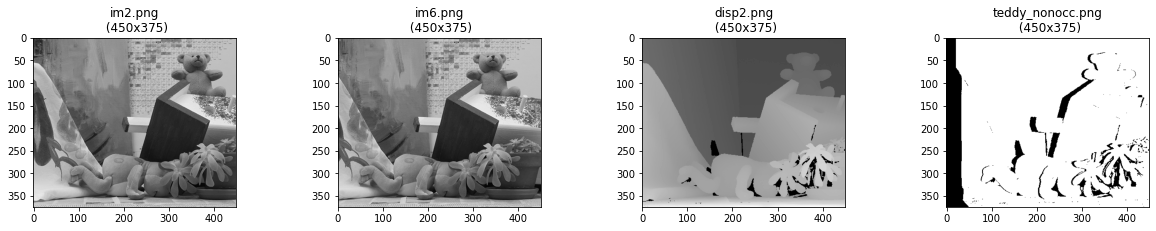

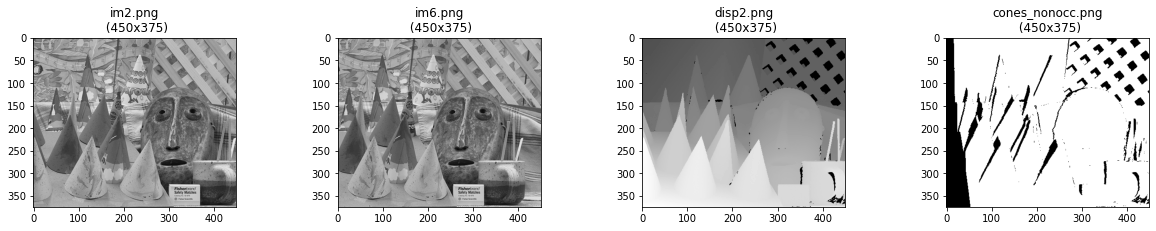

In [3]:
loaded_imgs_and_paths = list(mbu.get_images(DATASET_FOLDER, YEAR, scene) for scene in SCENES)

for im, path in loaded_imgs_and_paths:
    filenames = list(os.path.split(p)[-1] for p in path)
    plu.plot_images(im, filenames)

# Benchmarking and evaluation

In [4]:
###################################################################
# Initialising hyperparameters and matcher ########################
###################################################################

csv_logger = csv(CSV_FILEPATH, default_header=False)
csv_logger.set_header_function(csv_logger.get_header_v3)
csv_logger.write_csv_header()
csv_logger.set_line_function(csv.format_stereo_matching_results_v2)

progress_bar = SimpleProgressBar.get_instance()

MATCH = 60
GAP = -20
EGAP = -1


EXP_PARAMS = {"experiment_id":EXPERIMENT_TITLE, "match": MATCH,"gap":GAP,"egap":EGAP,\
                  "algo":str(m.__module__), "init_method":"default","dataset":DATASET,\
                  "preprocessing_method":"None","kernel_size":1,"kernel_spec":"None"}


SAVE_PATH  = os.path.join(ROOT_PATH, "experiments", "disparities", EXPERIMENT_TITLE)

saved_image_names = []
results = []

File ..\..\experiments\logs\ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_param_search.csv already exists, header has not been written.


In [5]:
###################################################################
# Matching ########################################################
###################################################################


EXP_PARAMS["init_method"] = "maclean_et_al"
progress_counter = 1
steps_to_be_taken = 2*60
for match_value in range(0,60):
    for i, scene in enumerate(SCENES):
        
        EXP_PARAMS["match"] = MATCH = match_value
        matcher = m(MATCH, GAP, EGAP)

        EXP_PARAMS["scene"] = scene
        EXP_PARAMS["image_filename"] = IMAGE_FILENAME = loaded_imgs_and_paths[i][1][0]
        EXP_PARAMS["img_res"] = "{0}x{1}".format(loaded_imgs_and_paths[i][0][1].shape[1], loaded_imgs_and_paths[i][0][1].shape[0])  
        occ = loaded_imgs_and_paths[i][0][3]
        gt = loaded_imgs_and_paths[i][0][2]

        matcher.set_images(loaded_imgs_and_paths[i][0][0].astype(np.float64), loaded_imgs_and_paths[i][0][1].astype(np.float64))

        tic = time.time()

        matcher.configure_instance(initialize_matrix_template= matcher.matrix_template_intit[1])

        tic=time.time()

        x,raw_disp_map = matcher.test_pipeline()
        toc = time.time()

        EXP_PARAMS["runtime"] = toc-tic

        disp = raw_disp_map
        disp = disp
        
        temp_path = u.save_disparity(SAVE_PATH, disp)
        saved_image_names.append(os.path.split(temp_path)[-1])
        
        EXP_PARAMS["image_filename"] = temp_path
       
        
        
        EXP_PARAMS["are_occlusions_errors"] = ARE_OCCLUSIONS_ERRORS = False

        EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad4"], EXP_PARAMS["BAD8"], EXP_PARAMS["abs_error"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
        BAD1, BAD2, BAD4, BAD8, ABS_ERR, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt/4, occ, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

        csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v3())

        EXP_PARAMS["are_occlusions_errors"]  = True
        EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad4"], EXP_PARAMS["BAD8"], EXP_PARAMS["abs_error"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
        BAD1, BAD2, BAD4, BAD8, ABS_ERR, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt/4, gt, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

        csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v3())
        results.append(disp)

        progress_bar.progress_bar(progress_counter, steps_to_be_taken, header= "Experiment on patch sizes in progress: ", progress_bar_steps=40)
        progress_counter+=1

Experiment on patch sizes in progress:  [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100.00 % completed: 120 / 120 steps

In [5]:
import pandas as pd
experiment_log = pd.read_csv(CSV_FILEPATH)
experiment_log.sort_values(by="bad4", inplace=True) 
experiment_log.head(30)

,experiment_id,match,gap,egap,algo,init_method,dataset,scene,image_filename,img_res,...,are_occlusions_errors,abs_error,mse,avg,eucledian,bad1,bad2,bad4,bad8,runtime
50,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,11,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1671064.0,1148.878563,11.610578,12858.985030,0.648597,0.512548,0.310271,0.155149,17.133021
54,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,12,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1598258.0,1073.837555,11.104720,12431.940476,0.645783,0.510853,0.312049,0.154892,16.053576
46,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,10,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1754336.0,1232.099551,12.189153,13316.574635,0.652030,0.516620,0.312897,0.158081,16.403352
66,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,15,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1504848.0,962.399011,10.455706,11769.207280,0.644414,0.510005,0.316482,0.158359,18.488687
62,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,14,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1530044.0,993.939830,10.630769,11960.509354,0.645373,0.510950,0.317239,0.158776,16.737556
58,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,13,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1578782.0,1047.457777,10.969401,12278.290109,0.646895,0.512819,0.317510,0.157817,18.496300
70,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,16,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1495682.0,951.182135,10.392021,11700.420505,0.644984,0.510762,0.318038,0.158762,16.408332
42,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,9,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1919632.0,1395.232105,13.337632,14170.750721,0.654941,0.520740,0.318275,0.166065,15.690641
74,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,17,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1491862.0,936.598030,10.365479,11610.375015,0.645220,0.511617,0.320741,0.161910,16.756253
78,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,18,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,..\..\experiments\disparities\ALG_004_EXP_002-...,450x375,...,False,1468522.0,908.420494,10.203313,11434.392332,0.645846,0.512215,0.322374,0.162076,15.862504


For analysis please visit <a href="ALG_004_EXP_002-VIS.ipynb">ALG_004_EXP_002-VIS</a>.